# PISA data exploration
## by Walaa Elnozahy

## Preliminary Wrangling

PISA stands for "The Program for International Student Assessment" which is an international assessment that measures students who are 15-year-old. it aims to assess their skills such as reading, mathematics, and science literacy every 3 years. This data is gathered from gathered done for students who are about to end their education. they are assessing their level and skills  along with details about them to check how well prepared they are for life beyond school.
> data should be containing all the details about students who went throught the survey and their skills and details
 






In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here we are going to load the data to check and identify what does it contain
> Load in your dataset and describe its properties through the questions below..

In [ ]:
# load in the dataset into a pandas dataframeb
pisadef=pd.read_csv('pisadict2012.csv', encoding= 'latin1');

In [ ]:
# General details about the data shape and composition
print(pisadef.shape)
print(pisadef.dtypes)
print(pisadef.head(10))

In [2]:
pisa=pd.read_csv('pisa2012.csv', encoding= 'latin1')

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# General details about the data shape and composition
print(pisa.shape)
print(pisa.dtypes)
pisa.head(10)

In [3]:
# remove the not needed index
pisa = pisa.drop("Unnamed: 0",axis=1)

In [ ]:
# preview data
print(pisa.head())
print(pisa.isnull().sum())
print(pisa.describe())
# check for dublicates 
print(sum(pisa.duplicated()))

Data sets has huge number of data. which is not totally needed and based on the info at hand we can select set of data that would be most useful to be used 
create a new dataset with these data only so we can work on it 

In [326]:
#based on all of this we will work using these fields
df = pisa[['STIDSTD','ST04Q01','AGE','CNT',
           'LMINS','MMINS','SMINS',
           'ST57Q01','ST57Q02','ST57Q03',
           'ST57Q04','ST57Q05','ST57Q06','OUTHOURS','QUESTID','ST06Q01','ST03Q01','ST03Q02',
           'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
           'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
           'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
           #'GRADE','ST55Q01','ST55Q02','ST55Q03','ST55Q04',
           #'SUBNATIO', 'STRATUM','OECD','NC',          
           #'ST15Q01','ST19Q01','ST02Q01',          
           #'ST27Q01','ST27Q02','ST27Q03','ST27Q04','ST27Q05','ST28Q01',
          'SCHOOLID','ST01Q01',
          'ST11Q01','ST11Q02',
          'ST08Q01','ST09Q01','ST115Q01',
          'ST13Q01','ST17Q01',
          'OCOD1','OCOD2']].copy()


df.rename(columns={'STIDSTD':'student_id','LMINS':'Learningtime_testlanguage',
                   'MMINS':'Learningtime_Mathematics','SMINS':'Learningtime_Science',
                   'AGE':'age','ST03Q01':'birth_month','ST03Q02':'birth_year',
                   'ST04Q01':'gender','CNT':'countrycode','OUTHOURS':'Out_StudyTime',
                   #'GRADE':'grade','SUBNATIO':'subregion',
                   #'ST55Q01':'Out_lessons_testlang',
                   #'ST55Q02':'Out_lessons_maths',
                   #'ST55Q03':'Out_lessons_science',
                   #'ST55Q04':'Out_lessons_other','ST02Q01':'study_programme',
                   #'OECD':'OECD_country','NC':'national_center_code',
                   #'ST19Q01':'Father_jobstatus','ST15Q01':'mother_jobstatus',
                   #'ST27Q01':'num_mobiles','ST27Q02':'num_tvs','ST27Q03':'num_computers',
                   #'ST27Q04':'num_cars','ST27Q05':'num_rooms','ST28Q01':'num_books',
                   'ST57Q01':'Out_StudyTime_Homework',
                   'ST57Q02':'Out_StudyTime_GuidedHomework',
                   'ST57Q03':'Out_StudyTime_PersonalTutor',
                   'ST57Q04':'Out_StudyTime_CommercialCompany',
                   'ST57Q05':'Out_StudyTime_WithParent',
                   'ST57Q06':'Out_StudyTime_Computer',
                   'QUESTID':'StudentQuestionnaireForm',
                   'SCHOOLID':'school_id','ST01Q01':'international_grade',
                   'ST11Q01':'AtHome_Mother', 'ST11Q02':'AtHome_Father',
                   'ST08Q01':'late_for_school','ST09Q01':'skip_day','ST115Q01':'skip_classes',
                   'ST13Q01':'mother_highestdegree','ST17Q01':'father_highestdegree',
                   'OCOD1':'mother_occupation','OCOD2':'father_occupation'}, inplace=True)

In [296]:
#save it in actual document 
df.to_csv('data.csv',index=False)

In [327]:
# General details about the data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(485490, 44)
student_id                           int64
gender                              object
age                                float64
countrycode                         object
Learningtime_testlanguage          float64
Learningtime_Mathematics           float64
Learningtime_Science               float64
Out_StudyTime_Homework             float64
Out_StudyTime_GuidedHomework       float64
Out_StudyTime_PersonalTutor        float64
Out_StudyTime_CommercialCompany    float64
Out_StudyTime_WithParent           float64
Out_StudyTime_Computer             float64
Out_StudyTime                      float64
StudentQuestionnaireForm            object
ST06Q01                            float64
birth_month                          int64
birth_year                           int64
PV1MATH                            float64
PV2MATH                            float64
PV3MATH                            float64
PV4MATH                            float64
PV5MATH                            float6

,student_id,gender,age,countrycode,Learningtime_testlanguage,Learningtime_Mathematics,Learningtime_Science,Out_StudyTime_Homework,Out_StudyTime_GuidedHomework,Out_StudyTime_PersonalTutor,...,international_grade,AtHome_Mother,AtHome_Father,late_for_school,skip_day,skip_classes,mother_highestdegree,father_highestdegree,mother_occupation,father_occupation
0,1,Female,16.17,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,10,Yes,Yes,None,None,1.0,<ISCED level 3A>,<ISCED level 3A>,Building architects,Primary school teachers
1,2,Female,16.17,Albania,315.0,270.0,90.0,NaN,NaN,6.0,...,10,Yes,Yes,One or two times,None,1.0,<ISCED level 3A>,<ISCED level 3A>,"Tailors, dressmakers, furriers and hatters",Building construction labourers
2,3,Female,15.58,Albania,300.0,NaN,NaN,NaN,6.0,6.0,...,9,Yes,Yes,None,None,1.0,"<ISCED level 3B, 3C>",<ISCED level 3A>,Housewife,Bricklayers and related workers
3,4,Female,15.67,Albania,135.0,135.0,90.0,10.0,2.0,2.0,...,9,Yes,Yes,None,None,1.0,"<ISCED level 3B, 3C>",<ISCED level 3A>,Housewife,"Cleaners and helpers in offices, hotels and ot..."
4,5,Female,15.50,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,9,Yes,Yes,One or two times,None,2.0,She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>",Housewife,Economists
5,6,Female,15.58,Albania,NaN,NaN,NaN,3.0,2.0,9.0,...,9,Yes,Yes,One or two times,None,1.0,"<ISCED level 3B, 3C>",<ISCED level 2>,Missing,Cooks
6,7,Female,16.08,Albania,135.0,225.0,90.0,3.0,3.0,2.0,...,10,Yes,Yes,Three or four times,None,1.0,"<ISCED level 3B, 3C>",<ISCED level 3A>,Housewife,Stall and market salespersons
7,8,Male,15.83,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,10,Yes,Yes,None,None,1.0,<ISCED level 3A>,<ISCED level 3A>,Housewife,General office clerks
8,9,Female,15.50,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,9,NaN,NaN,None,NaN,1.0,<ISCED level 3A>,<ISCED level 3A>,Primary school teachers,"Bakers, pastry-cooks and confectionery makers"
9,10,Female,15.67,Albania,240.0,90.0,270.0,NaN,NaN,0.0,...,10,Yes,Yes,One or two times,One or two times,2.0,<ISCED level 3A>,<ISCED level 3A>,Sales and marketing managers,Civil engineers


In [328]:
# let's review the final dataset to check for duplications
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
485485    False
485486    False
485487    False
485488    False
485489    False
Length: 485490, dtype: bool


In [329]:
#check null values in the final dataset
print(df.isnull().sum())

student_id                              0
gender                                  0
age                                   116
countrycode                             0
Learningtime_testlanguage          202624
Learningtime_Mathematics           202187
Learningtime_Science               214576
Out_StudyTime_Homework             184123
Out_StudyTime_GuidedHomework       215682
Out_StudyTime_PersonalTutor        201677
Out_StudyTime_CommercialCompany    205833
Out_StudyTime_WithParent           195988
Out_StudyTime_Computer             196062
Out_StudyTime                      176691
StudentQuestionnaireForm                0
ST06Q01                             27496
birth_month                             0
birth_year                              0
PV1MATH                                 0
PV2MATH                                 0
PV3MATH                                 0
PV4MATH                                 0
PV5MATH                                 0
PV1READ                           

### based on this we need to do the following:
- let's gather the values needed for time to study out school and show total study
- the out study data has too much null that removing it may affect the sample. we need fill the NAN with the average 
- for age, grades we can either discard the data or set the null values to equal age average per each country/school - I decide to remove it  won't affect the total data.
- lastly will calculate average for reading, scince and math scores then calculate the total average score for all 


In [330]:
df['total_outStudy_time'] = df[['Out_StudyTime_Homework', 'Out_StudyTime_GuidedHomework',
                                     'Out_StudyTime_PersonalTutor','Out_StudyTime_CommercialCompany',
                                     'Out_StudyTime_WithParent','Out_StudyTime_Computer','Out_StudyTime']].sum(axis=1)

In [331]:
#add mean to all numeric values
df['Learningtime_testlanguage'].fillna((df['Learningtime_testlanguage'].mean()), inplace=True)
df['Learningtime_Mathematics'].fillna((df['Learningtime_Mathematics'].mean()), inplace=True)
df['Learningtime_Science'].fillna((df['Learningtime_Science'].mean()), inplace=True)
df['Out_StudyTime_Homework'].fillna((df['Out_StudyTime_Homework'].mean()), inplace=True)
df['Out_StudyTime_GuidedHomework'].fillna((df['Out_StudyTime_GuidedHomework'].mean()), inplace=True)
df['Out_StudyTime_PersonalTutor'].fillna((df['Out_StudyTime_PersonalTutor'].mean()), inplace=True)
df['Out_StudyTime_CommercialCompany'].fillna((df['Out_StudyTime_CommercialCompany'].mean()), inplace=True)
df['Out_StudyTime_WithParent'].fillna((df['Out_StudyTime_WithParent'].mean()), inplace=True)
df['Out_StudyTime_Computer'].fillna((df['Out_StudyTime_Computer'].mean()), inplace=True)
df['Out_StudyTime'].fillna((df['Out_StudyTime'].mean()), inplace=True)
df['ST06Q01'].fillna((df['ST06Q01'].mean()), inplace=True)

In [332]:
# calculate Average for all scores Math, Science, reading
Reading = df.PV1READ.value_counts()
df['average_read'] = df[['PV1READ', 'PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
df['average_science'] = df[['PV1SCIE', 'PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)
df['average_math'] = df[['PV1MATH', 'PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
df['total_avg_score'] = df[['average_math', 'average_science','average_read']].mean(axis=1)

df.head()

,student_id,gender,age,countrycode,Learningtime_testlanguage,Learningtime_Mathematics,Learningtime_Science,Out_StudyTime_Homework,Out_StudyTime_GuidedHomework,Out_StudyTime_PersonalTutor,...,skip_classes,mother_highestdegree,father_highestdegree,mother_occupation,father_occupation,total_outStudy_time,average_read,average_science,average_math,total_avg_score
0,1,Female,16.17,Albania,219.276636,226.007056,211.12246,5.49377,1.623629,0.954044,...,1.0,<ISCED level 3A>,<ISCED level 3A>,Building architects,Primary school teachers,0.0,261.01424,371.91348,366.18634,333.038020
1,2,Female,16.17,Albania,315.000000,270.000000,90.00000,5.49377,1.623629,6.000000,...,1.0,<ISCED level 3A>,<ISCED level 3A>,"Tailors, dressmakers, furriers and hatters",Building construction labourers,16.0,384.68832,478.12382,470.56396,444.458700
2,3,Female,15.58,Albania,300.000000,226.007056,211.12246,5.49377,6.000000,6.000000,...,1.0,"<ISCED level 3B, 3C>",<ISCED level 3A>,Housewife,Bricklayers and related workers,48.0,405.18154,486.60946,505.53824,465.776413
3,4,Female,15.67,Albania,135.000000,135.000000,90.00000,10.00000,2.000000,2.000000,...,1.0,"<ISCED level 3B, 3C>",<ISCED level 3A>,Housewife,"Cleaners and helpers in offices, hotels and ot...",34.0,477.46376,453.97240,449.45476,460.296973
4,5,Female,15.50,Albania,219.276636,226.007056,211.12246,5.49377,1.623629,0.954044,...,2.0,She did not complete <ISCED level 1>,"<ISCED level 3B, 3C>",Housewife,Economists,0.0,256.01010,367.15778,385.50398,336.223953


In [333]:
df.dropna(subset=['age'], inplace=True)
print(df.isnull().sum())

student_id                             0
gender                                 0
age                                    0
countrycode                            0
Learningtime_testlanguage              0
Learningtime_Mathematics               0
Learningtime_Science                   0
Out_StudyTime_Homework                 0
Out_StudyTime_GuidedHomework           0
Out_StudyTime_PersonalTutor            0
Out_StudyTime_CommercialCompany        0
Out_StudyTime_WithParent               0
Out_StudyTime_Computer                 0
Out_StudyTime                          0
StudentQuestionnaireForm               0
ST06Q01                                0
birth_month                            0
birth_year                             0
PV1MATH                                0
PV2MATH                                0
PV3MATH                                0
PV4MATH                                0
PV5MATH                                0
PV1READ                                0
PV2READ         

In [334]:
df['AtHome_Mother'].value_counts()

Yes    432908
No      27540
Name: AtHome_Mother, dtype: int64

In [335]:

df['AtHome_Father'].value_counts()

Yes    372077
No      68856
Name: AtHome_Father, dtype: int64

In [336]:
df['late_for_school'].value_counts()

None                     305981
One or two times         124357
Three or four times       29811
Five or more times        18880
Name: late_for_school, dtype: int64

In [337]:
df['skip_day'].value_counts()

None                     385902
One or two times          75958
Three or four times       10876
Five or more times         6282
Name: skip_day, dtype: int64

In [338]:
df['skip_classes'].value_counts()

1.0    378483
2.0     81324
3.0     12213
4.0      7134
Name: skip_classes, dtype: int64

In [339]:
df['mother_occupation'].value_counts()

Housewife                                                       74308
Missing                                                         27038
Shop sales assistants                                           13123
Primary school teachers                                         10320
Secretaries (general)                                            9862
                                                                ...  
Insulation workers                                                  3
Shotfirers and blasters                                             3
Market-oriented skilled forestry, fishery and hunting worker        3
Underwater divers                                                   2
Drivers of animal-drawn vehicles and machinery                      1
Name: mother_occupation, Length: 588, dtype: int64

In [340]:
df['father_occupation'].value_counts()

Missing                                                         36552
Vague(a good job, a quiet job, a well paid job, an office jo    14715
Heavy truck and lorry drivers                                   11813
Bricklayers and related workers                                 10534
Car, taxi and van drivers                                        9916
                                                                ...  
Market-oriented skilled forestry, fishery and hunting worker       15
Astrologers, fortune-tellers and related workers                   14
Midwifery associate professionals                                  13
Librarians, archivists and curators                                10
Chemical and photographic products plant and machine operato        8
Name: father_occupation, Length: 588, dtype: int64

In [311]:
df['mother_occupation'].value_counts()

Housewife                                                       74308
Missing                                                         27038
Shop sales assistants                                           13123
Primary school teachers                                         10320
Secretaries (general)                                            9862
                                                                ...  
Insulation workers                                                  3
Shotfirers and blasters                                             3
Market-oriented skilled forestry, fishery and hunting worker        3
Underwater divers                                                   2
Drivers of animal-drawn vehicles and machinery                      1
Name: mother_occupation, Length: 588, dtype: int64

In [313]:
df['father_highestdegree'].value_counts()

<ISCED level 3A>                        215261
<ISCED level 3B, 3C>                     91169
<ISCED level 2>                          84302
<ISCED level 1>                          35910
He did not complete <ISCED level 1>      16512
Name: father_highestdegree, dtype: int64

In [312]:
df['mother_highestdegree'].value_counts()

<ISCED level 3A>                         236973
<ISCED level 3B, 3C>                      83037
<ISCED level 2>                           82594
<ISCED level 1>                           36524
She did not complete <ISCED level 1>      18739
Name: mother_highestdegree, dtype: int64

#### Fill the NAN value with no info 

In [83]:
df.fillna(value='no info', inplace=True)

In [347]:
print(df['AtHome_Mother'].value_counts())
print('=================== \n')
print(df['AtHome_Father'].value_counts())
print('=================== \n')
print(df['late_for_school'].value_counts())
print('=================== \n')
print(df['skip_day'].value_counts())
print('=================== \n')
print(df['skip_classes'].value_counts())
print('=================== \n')
print(df['mother_occupation'].value_counts())
print('=================== \n')
print(df['father_occupation'].value_counts())
print('=================== \n')
print(df['mother_highestdegree'].value_counts())
print('=================== \n')
print(df['mother_highestdegree'].value_counts())

Yes    432908
No      27540
Name: AtHome_Mother, dtype: int64

Yes    372077
No      68856
Name: AtHome_Father, dtype: int64

None                     305981
One or two times         124357
Three or four times       29811
Five or more times        18880
Name: late_for_school, dtype: int64

None                     385902
One or two times          75958
Three or four times       10876
Five or more times         6282
Name: skip_day, dtype: int64

1.0    378483
2.0     81324
3.0     12213
4.0      7134
Name: skip_classes, dtype: int64

Housewife                                                       74308
Missing                                                         27038
Shop sales assistants                                           13123
Primary school teachers                                         10320
Secretaries (general)                                            9862
                                                                ...  
Insulation workers                       

In [348]:
#we take a copy of this data and start our final cleaning process 
df_copy=df.copy()
df_copy.describe()

,student_id,age,Learningtime_testlanguage,Learningtime_Mathematics,Learningtime_Science,Out_StudyTime_Homework,Out_StudyTime_GuidedHomework,Out_StudyTime_PersonalTutor,Out_StudyTime_CommercialCompany,Out_StudyTime_WithParent,...,PV4SCIE,PV5SCIE,school_id,international_grade,skip_classes,total_outStudy_time,average_read,average_science,average_math,total_avg_score
count,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000,...,485374.000000,485374.000000,485374.000000,485374.000000,479154.000000,485374.000000,485374.000000,485374.000000,485374.000000,485374.000000
mean,6133.070706,15.784283,219.277653,226.004904,211.113341,5.493903,1.623551,0.953956,0.911711,1.213306,...,475.797329,475.832958,240.104371,9.813105,1.265368,14.125351,472.021886,475.820775,469.667107,472.503256
std,6732.077462,0.290221,74.807765,74.444271,98.109192,4.242007,1.932044,1.653342,1.792824,1.817322,...,101.516099,101.569703,278.507757,3.733101,0.579015,19.835101,98.865688,98.002102,100.787857,96.038776
min,1.000000,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.429700,17.754600,1.000000,7.000000,1.000000,0.000000,6.445400,25.158540,54.767080,77.114593
25%,1811.000000,15.580000,200.000000,200.000000,180.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,404.457300,404.457300,61.000000,9.000000,1.000000,0.000000,405.102080,405.856020,396.019640,404.011398
50%,3740.000000,15.750000,219.276636,226.007056,211.122460,5.493770,1.623629,0.954044,0.911821,1.213363,...,475.979100,475.979100,136.000000,10.000000,1.000000,8.000000,475.477980,475.512860,465.734540,472.065883
75%,7454.000000,16.000000,225.000000,226.007056,211.122460,5.493770,1.623629,0.954044,0.911821,1.213363,...,547.780700,547.780700,291.000000,10.000000,1.000000,20.000000,542.835480,546.381940,540.123080,541.475883
max,33806.000000,16.330000,2400.000000,3000.000000,2975.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,926.557300,880.958600,1471.000000,96.000000,4.000000,360.000000,849.359740,857.832900,903.107960,826.592027


In [397]:
#save it in actual document 
df_copy.to_csv('Finaldata.csv',index=False)

In [163]:
df_copy=pd.read_csv('Finaldata.csv')

### What is the structure of your dataset?

> This data set consists of 636 column feature that shows detila about each student 
and 485,490 students data included these data includes many thing such as [age, grade, student ID, nationality, motnher and father education and job status, language used in their home, details about their level and wealth]
some of the variables are numeric such as the age, weight. but most of the data are categorical such as the job status, cpuntries


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out who are the top student's countries. what is the common feature for these students is is the number of hours they study.does perfrormance is based on gender, location, or student attitudes?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the most important fields based on these data is grades per each student for math, scinece and read which will determine the students level. Along with other categorical indication for the student such as geneder, country of origin and the grade he is in. Also the study time logically should be effective

## Univariate Exploration

Now In this section, we are going to start investigation per each variable individually to check its details. you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.
### parameter 1: Students Countries

In [57]:
#number of students per each countries
df_copy.countrycode.value_counts()

Mexico                      33720
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: countrycode, Length: 68, dtype: int64

<AxesSubplot:xlabel='count', ylabel='countrycode'>

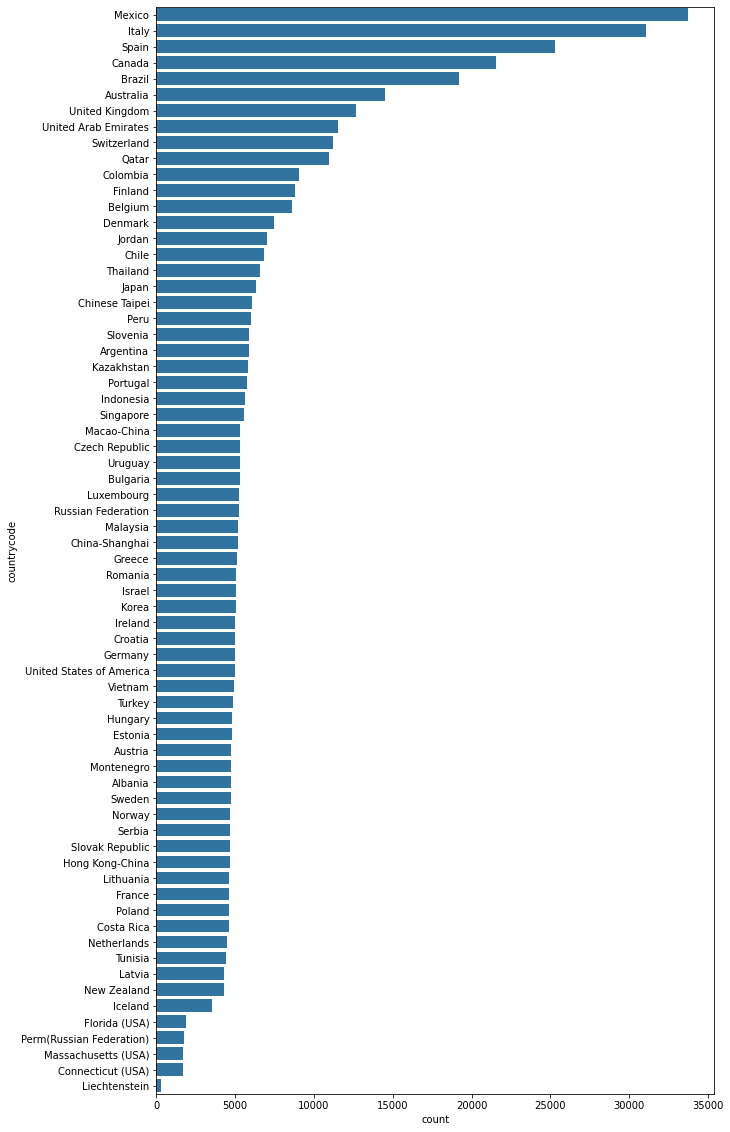

In [280]:
#list of all countires
base_color = sns.color_palette()[0] # To give the same colors to the bars
year= df_copy.countrycode.value_counts().index
fig_dims = (10,20)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(y='countrycode',data = df_copy , color=base_color,order=year)

In [59]:
#top 10 Count
df_copy.countrycode.value_counts().index[:10]

Index(['Mexico', 'Italy', 'Spain', 'Canada', 'Brazil', 'Australia',
       'United Kingdom', 'United Arab Emirates', 'Switzerland', 'Qatar'],
      dtype='object')

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


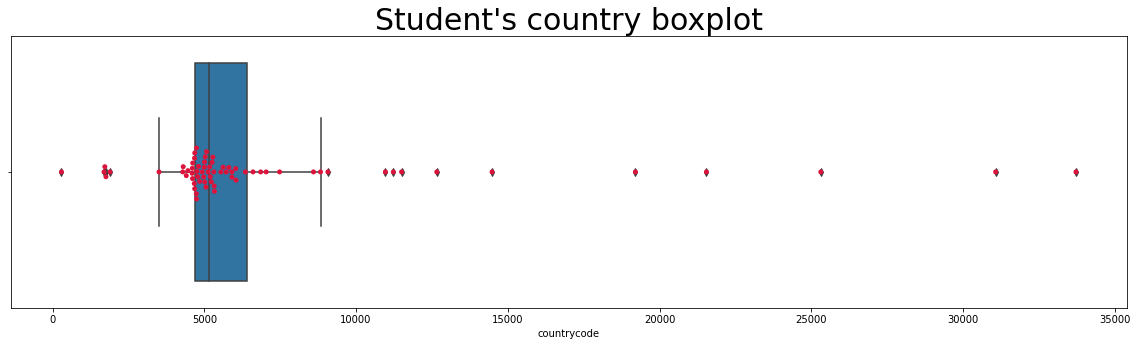

In [60]:
#represent counts in boxplot 
plt.figure(figsize=(20,5))
sns.boxplot(df_copy['countrycode'].value_counts())
sns.swarmplot(df_copy['countrycode'].value_counts(), color='crimson')
plt.title('Student\'s country boxplot', size=30);

In [62]:
df_copy['countrycode'].describe()

count     485374
unique        68
top       Mexico
freq       33720
Name: countrycode, dtype: object

### Conclusion for Students' countries
**Based on the student's country the top 10 countries are**
> ('Mexico', 'Italy', 'Spain', 'Canada', 'Brazil', 'Australia','United Kingdom', 'United Arab Emirates', 'Switzerland', 'Qatar') 

Most of the mean for the most of the countries is **5000**. there is many outliers specially for the top countries such as mexico that gets **33,806** and italy with **31,073**. 

=========
### parameter 2: Start leaning age

<AxesSubplot:>

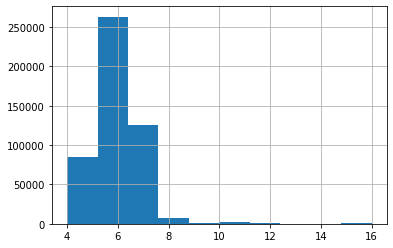

In [87]:
df_copy.ST06Q01.hist()

In [88]:
df_copy.ST06Q01.describe()

count    485374.000000
mean          6.148930
std           0.942734
min           4.000000
25%           6.000000
50%           6.000000
75%           7.000000
max          16.000000
Name: ST06Q01, dtype: float64

### Conclusion for start learn age
based on this most students started to learn on age 6, there is outliers which are small number of students who started to learn late on age of 16

=========
### parameter 3: Student's age

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


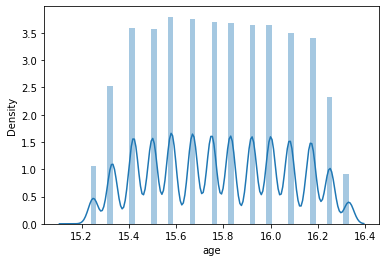

In [89]:
sns.distplot(df_copy['age']);

<AxesSubplot:xlabel='count', ylabel='age'>

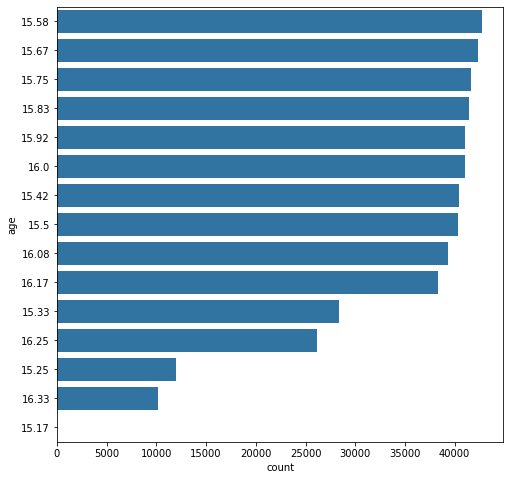

In [90]:
age= df_copy.age.value_counts().index
fig_dims = (8,8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(y='age',data = df_copy , color=base_color,order=age)

<AxesSubplot:xlabel='count', ylabel='birth_month'>

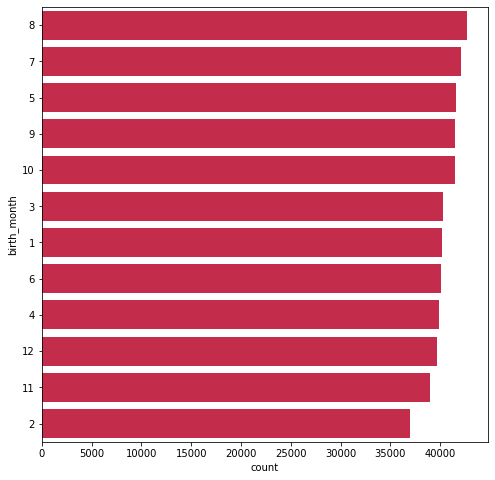

In [91]:
birthyear= df_copy.birth_month.value_counts().index
fig_dims = (8,8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(y='birth_month',data = df_copy , color='crimson',order=birthyear)

In [92]:
print (age.min(), ' and maximum of', age.max())
print ('number of students per each age:\n', df_copy.age.value_counts())
print('\n',df['age'].describe())

15.17  and maximum of 16.33
number of students per each age:
 15.58    42762
15.67    42353
15.75    41664
15.83    41402
15.92    41084
16.00    41049
15.42    40437
15.50    40291
16.08    39313
16.17    38356
15.33    28354
16.25    26139
15.25    11986
16.33    10183
15.17        1
Name: age, dtype: int64

 count    485374.000000
mean         15.784283
std           0.290221
min          15.170000
25%          15.580000
50%          15.750000
75%          16.000000
max          16.330000
Name: age, dtype: float64


### Conclusion for age
there is no huge age gab between students as min age is 15.17  and maximum of 16.33
Most students are between 15.5 and 16 
mean = 15.784283

=========
### parameter 4: Gender

Male Students:  240376  which is: 0.4952%
Female Students:  244998  which is:  0.5048%


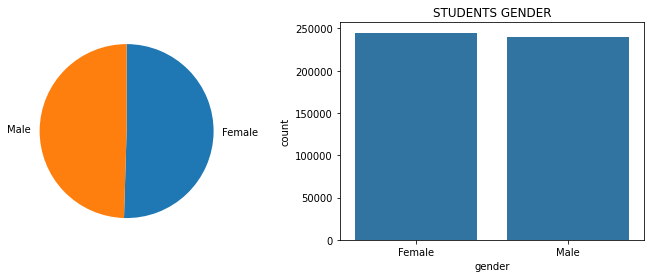

In [93]:
gender= df_copy.gender.value_counts().index
fig_dims = (4,4)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))  # 1 row, 2 columns
sns.countplot(x='gender',data = df_copy , color=base_color,order=gender,ax=ax2)
plt.title('STUDENTS GENDER');
ax1.pie(df_copy['gender'].value_counts(), labels=df_copy['gender'].value_counts().index,startangle=90,counterclock=False)
print('Male Students: ',df_copy['gender'].value_counts()['Male'],' which is: {:.4f}%'.format(df_copy['gender'].value_counts()['Male']/df_copy.shape[0]))
print('Female Students: ',df_copy['gender'].value_counts()['Female'],' which is:  {:.4f}%'.format(df_copy['gender'].value_counts()['Female']/df_copy.shape[0]))


### Conclusion for gender
Seems to be not biased as the count of female and male are so similar almost divided in half Most 
Male Students:  239809  which is: 0.4950%
Female Students:  244693  which is:  0.5050%


=========
### parameter 5: students score in science, math and reading

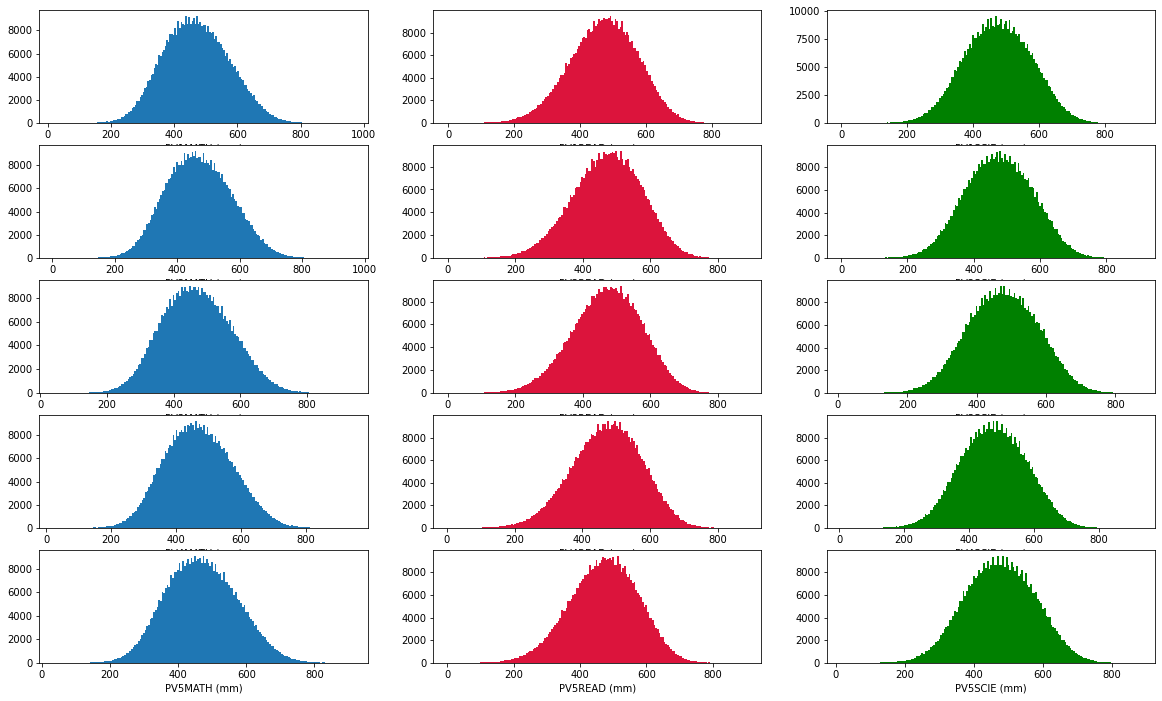

In [94]:
#sns.boxplot(data=df_copy, x='PV3MATH', y='PV4MATH', color=base_color)
#}plt.xticks(rotation=15);
#fig, ax = plt.subplots(nrows=5, figsize = [10,8])
fig, ax= plt.subplots(nrows=5,ncols=3,figsize=[20,12])

mathvariables = ['PV1MATH', 'PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']      
readvariables = ['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']
scievariables = ['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']
i=0 
for var in mathvariables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[i,0].hist(data = df_copy, x = var, bins = bins)
    ax[i,0].set_xlabel('{} (mm)'.format(var))
    i+=1
        
r=0
for var in readvariables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[r,1].hist(data = df_copy, x = var, bins = bins, color='crimson')
    ax[r,1].set_xlabel('{} (mm)'.format(var))
    r+=1
s=0   
for var in scievariables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[s,2].hist(data = df_copy, x = var, bins = bins, color='green')
    ax[s,2].set_xlabel('{} (mm)'.format(var))
    s+=1
plt.show()


In [96]:
print(df_copy['PV1READ'].describe())
print('=================== \n')
print(df_copy['PV2READ'].describe()) 
print('=================== \n')     
print(df_copy['PV3READ'].describe())
print('=================== \n')
print(df_copy['PV4READ'].describe())
print('=================== \n')
print(df_copy['PV5READ'].describe())
print('=================== \n')
print(df_copy['PV1SCIE'].describe())
print('=================== \n')      
print(df_copy['PV2SCIE'].describe())
print('=================== \n')
print(df_copy['PV3SCIE'].describe())
print('=================== \n')
print(df_copy['PV4SCIE'].describe())
print('=================== \n')
print(df_copy['PV5SCIE'].describe())
print('=================== \n')

count    485374.000000
mean        472.019485
std         102.508016
min           0.083400
25%         403.600700
50%         475.455000
75%         544.502500
max         904.802600
Name: PV1READ, dtype: float64

count    485374.000000
mean        472.083041
std         102.628943
min           0.703500
25%         403.360100
50%         475.535200
75%         544.662800
max         881.239200
Name: PV2READ, dtype: float64

count    485374.000000
mean        472.036835
std         102.643252
min           0.703500
25%         403.360100
50%         475.455000
75%         544.503500
max         884.447000
Name: PV3READ, dtype: float64

count    485374.000000
mean        471.940741
std         102.578609
min           4.134400
25%         403.360100
50%         475.535200
75%         544.502500
max         881.159000
Name: PV4READ, dtype: float64

count    485374.000000
mean        472.029331
std         102.661361
min           2.307400
25%         403.360100
50%         475.535200
75

average_read  details is 
 count    485374.000000
mean        472.021886
std          98.865688
min           6.445400
25%         405.102080
50%         475.477980
75%         542.835480
max         849.359740
Name: average_read, dtype: float64
average_science  details is 
 count    485374.000000
mean        475.820775
std          98.002102
min          25.158540
25%         405.856020
50%         475.512860
75%         546.381940
max         857.832900
Name: average_science, dtype: float64
average_math  details is 
 count    485374.000000
mean        469.667107
std         100.787857
min          54.767080
25%         396.019640
50%         465.734540
75%         540.123080
max         903.107960
Name: average_math, dtype: float64


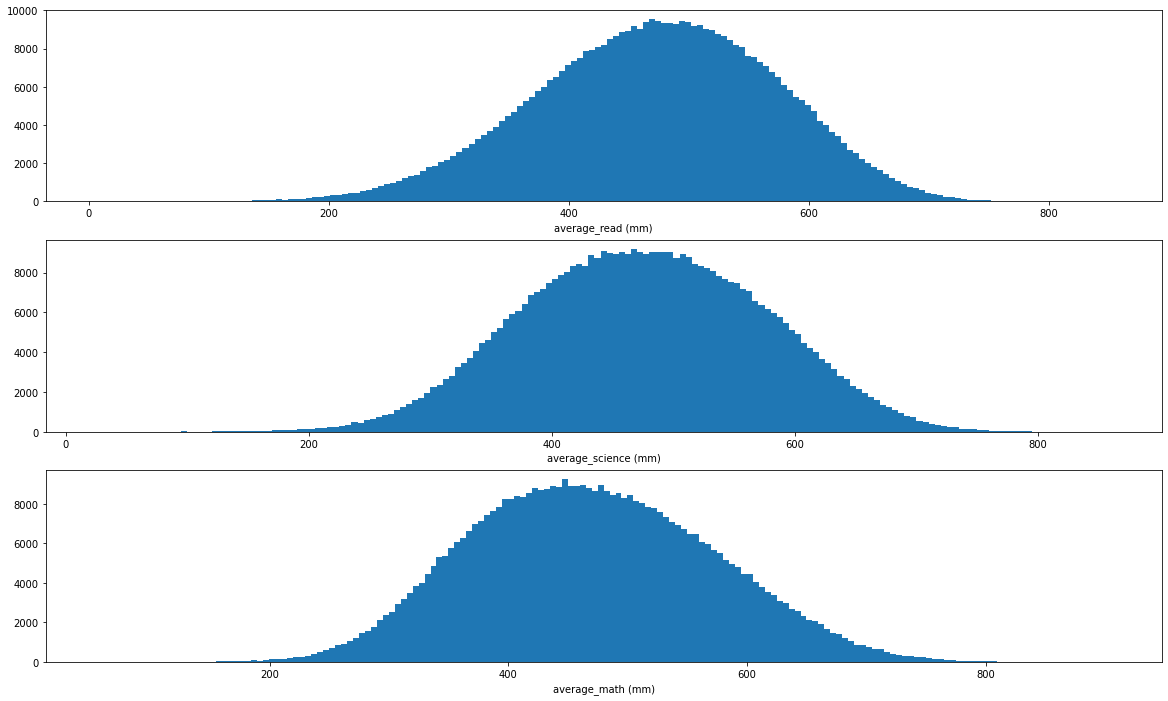

In [97]:
fig, ax= plt.subplots(nrows=3,figsize=[20,12])

variables = ['average_read','average_science','average_math']
i=0 
for var in variables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[i].hist(data = df_copy, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))
    i+=1
    print("\033[1m" + var, ' details is \n' + "\033[0m",df_copy[var].describe())

plt.show()


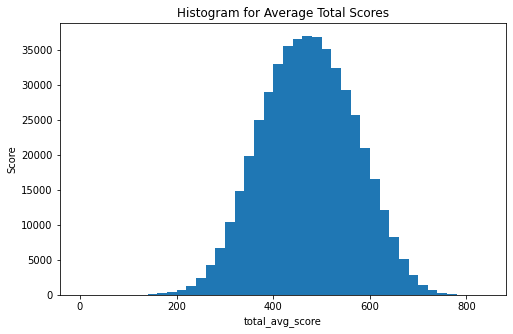

In [103]:
# Histogram of total_avg_score
plt.figure(figsize=(8, 5))
plt.hist(data = df_copy, x = 'total_avg_score', bins = bins, color = base_color)
plt.xlabel('total_avg_score')
plt.ylabel('Score')
plt.title('Histogram for Average Total Scores');

### conclusion scores
the scores seems balanced and the distribution takes the bill shape. 
scores for read, scinece and math is around 465 and 475 however seems like the math has the most outliers with top students who got 903

### parameter 6: learning and studying time


Learningtime_testlanguage  details is 
 count    485374.000000
mean        219.277653
std          74.807765
min           0.000000
25%         200.000000
50%         219.276636
75%         225.000000
max        2400.000000
Name: Learningtime_testlanguage, dtype: float64
Learningtime_Mathematics  details is 
 count    485374.000000
mean        226.004904
std          74.444271
min           0.000000
25%         200.000000
50%         226.007056
75%         226.007056
max        3000.000000
Name: Learningtime_Mathematics, dtype: float64
Learningtime_Science  details is 
 count    485374.000000
mean        211.113341
std          98.109192
min           0.000000
25%         180.000000
50%         211.122460
75%         211.122460
max        2975.000000
Name: Learningtime_Science, dtype: float64


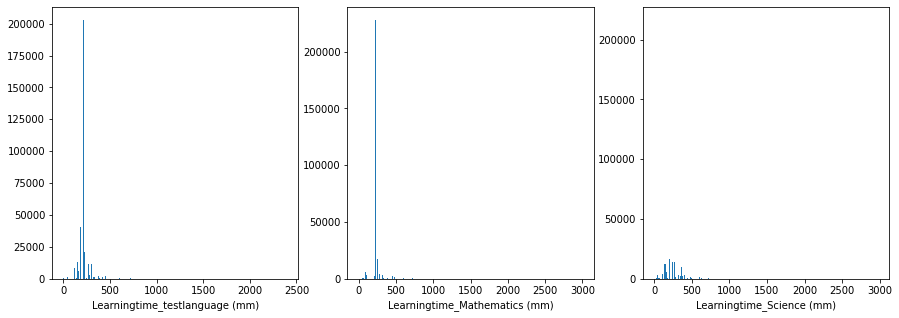

In [139]:
# Learning time
fig, ax= plt.subplots(ncols=3,figsize=[15,5])

mainlearningvariables = ['Learningtime_testlanguage', 'Learningtime_Mathematics','Learningtime_Science']      

i=0 
for var in mainlearningvariables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[i].hist(data = df_copy, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))
    print("\033[1m" + var, ' details is \n' + "\033[0m",df_copy[var].describe())

    i+=1
plt.show()


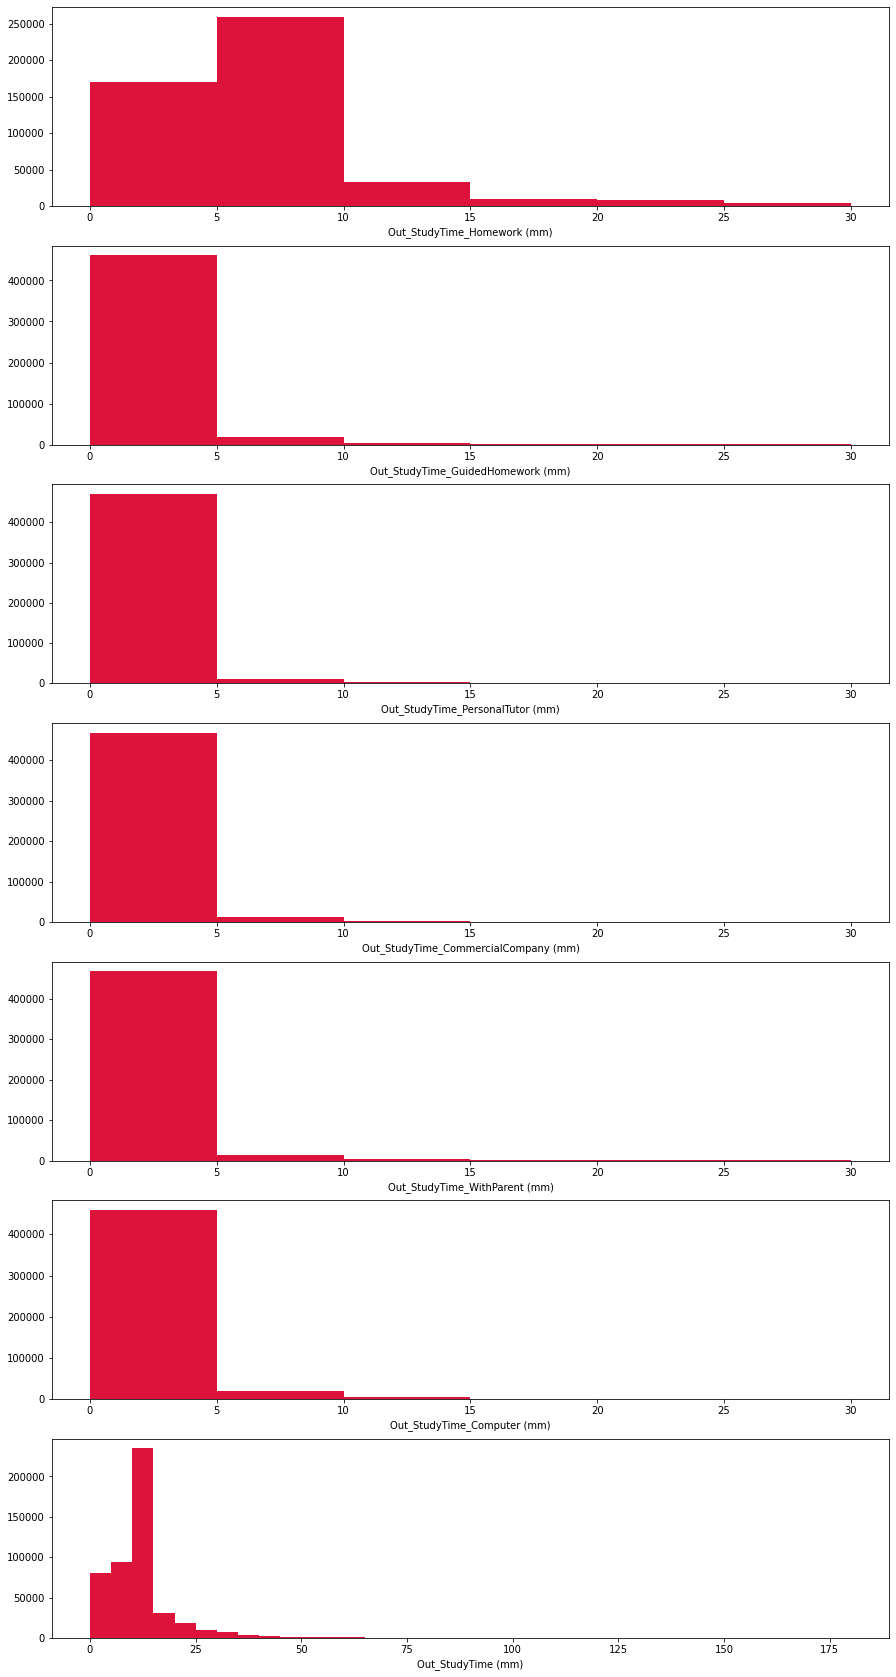

In [140]:
# Our study timenrows
    
fig, ax= plt.subplots( nrows=7,figsize=[15,30])

OutstudyVariables = ['Out_StudyTime_Homework',
                     'Out_StudyTime_GuidedHomework',
                     'Out_StudyTime_PersonalTutor',
                     'Out_StudyTime_CommercialCompany',
                     'Out_StudyTime_WithParent',
                     'Out_StudyTime_Computer',
                     'Out_StudyTime']
r=0
for var in OutstudyVariables:
    bins = np.arange(min(df_copy[var]), max(df_copy[var])+5, 5)
    ax[r].hist(data = df_copy, x = var, bins = bins, color='crimson')
    ax[r].set_xlabel('{} (mm)'.format(var))
    #print("\033[1m" + var, ' details is \n' + "\033[0m",df_copy[var].describe())

    r+=1

plt.show()

In [ ]:
Based on this it seems that the learning time has a huge outliers 


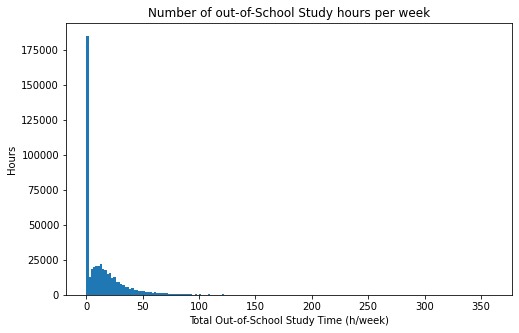

In [164]:
# Histogram of the Total Out-of-School Study Time
binsize = 2
bins = np.arange(0, df_copy['total_outStudy_time'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'total_outStudy_time', color = base_color, bins = bins)

plt.xlabel('Total Out-of-School Study Time (h/week)')
plt.ylabel('Hours')
plt.title('Number of out-of-School Study hours per week');

This occurs because of we calculated the total before handling the null values which caused a huge number of zeros. 
so we willdrop the zeros then will recalculate it after we already adjusted the numbers

In [247]:
newdf = df_copy[df_copy.total_outStudy_time != 0]

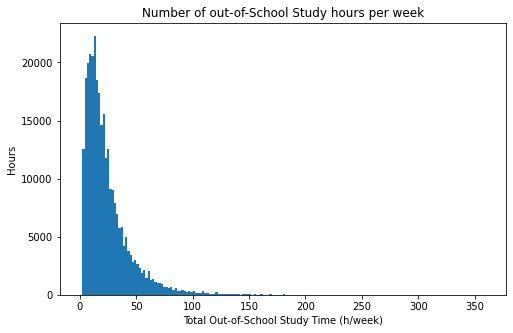

In [167]:
# Histogram of the Total Out-of-School Study Time
bins = np.arange(0, newdf['total_outStudy_time'].max()+2, 2)

plt.figure(figsize=[8, 5])
plt.hist(data = newdf, x = 'total_outStudy_time', color = base_color, bins = bins)

plt.xlabel('Total Out-of-School Study Time (h/week)')
plt.ylabel('Hours')
plt.title('Number of out-of-School Study hours per week');

seems that the our of school is right skewed and fewer number os student's are the ones who study alot. most of the students doesn't study much 

In [178]:
newdf2 = newdf[newdf.Learningtime_testlanguage < 500]
newdf2 = newdf2[newdf2.Learningtime_Mathematics < 500]
newdf2 = newdf2[newdf.Learningtime_Science < 500]

<ipython-input-178-22942bb5e07a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newdf2 = newdf2[newdf.Learningtime_Science < 500]


Learningtime_testlanguage  details is 
 count    287755.000000
mean        212.107317
std          72.088519
min           0.000000
25%         180.000000
50%         219.276636
75%         240.000000
max         495.000000
Name: Learningtime_testlanguage, dtype: float64
Learningtime_Mathematics  details is 
 count    287755.000000
mean        217.693430
std          71.234696
min           0.000000
25%         180.000000
50%         225.000000
75%         250.000000
max         495.000000
Name: Learningtime_Mathematics, dtype: float64
Learningtime_Science  details is 
 count    287755.000000
mean        199.412401
std          94.693596
min           0.000000
25%         134.000000
50%         200.000000
75%         250.000000
max         498.000000
Name: Learningtime_Science, dtype: float64


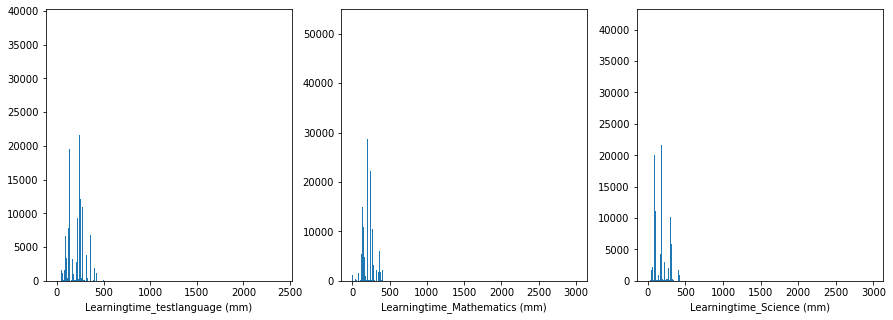

In [182]:
# Learning time
fig, ax= plt.subplots(ncols=3,figsize=[15,5])

mainlearningvariables = ['Learningtime_testlanguage', 'Learningtime_Mathematics','Learningtime_Science']      

i=0 
for var in mainlearningvariables:
    bins = np.arange(min(newdf2[var]), max(df_copy[var])+5, 5)
    ax[i].hist(data = newdf2, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))
    print("\033[1m" + var, ' details is \n' + "\033[0m",newdf2[var].describe())

    i+=1
plt.show()


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the scores are normally distributed, however as we have 5 levels for the scores. then I had to calculate the average for the math so we can use it directly. Also the countries seems to have outliers 
> Also the studying duration is left skewed with huge outliers varies from zero and the max was 200

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Score and the calculated the average score for each type [Scinece, reading and math] were normally distributed which was good. However the out school data had huge number of zero study that ruined the distribution. So I removed this outlier 

## Bivariate Exploration

In this section we are going to start to check the relation between 2 vaiables in the system such as the age, gender and location with regard to the total average score

<AxesSubplot:xlabel='count', ylabel='school_id'>

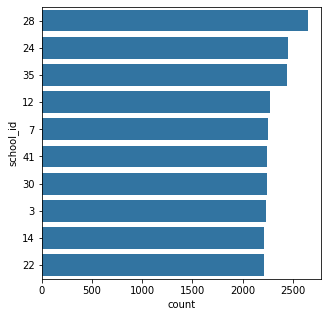

In [183]:
#list of all schools
base_color = sns.color_palette()[0] # To give the same colors to the bars
school_id= df_copy.school_id.value_counts().index[:10]
fig_dims = (5,5)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(y='school_id',data = df_copy , color=base_color,order=school_id)

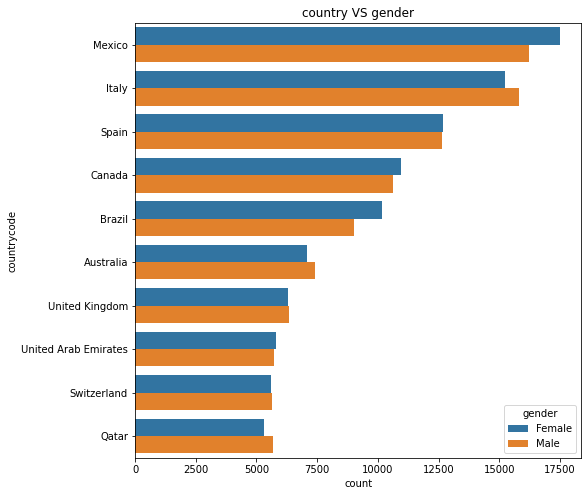

In [184]:
# let's compare top countries vs. gender
year= df_copy.countrycode.value_counts().index[:10]
fig = plt.subplots(figsize=(8,8))
country_gender = sns.countplot(y=df.countrycode, hue=df.gender, data=df_copy,order=year)
country_gender.set_title("country VS gender")
plt.show()

seems there is no huge differenrnce between the distrubution of male and females per each country

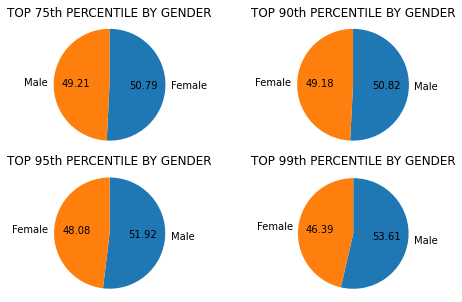

In [192]:
df_75=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.75)')
df_90=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.90)')
df_95=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.95)')
df_99=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.99)')

percent=[75,90,95,99]

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(8,5))

ax=ax.flatten()
for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    #plt.countplot(y=df.countrycode, hue=df.gender, data=df_copy,order=year)
    plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f')
    plt.axis('square')
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE BY GENDER')

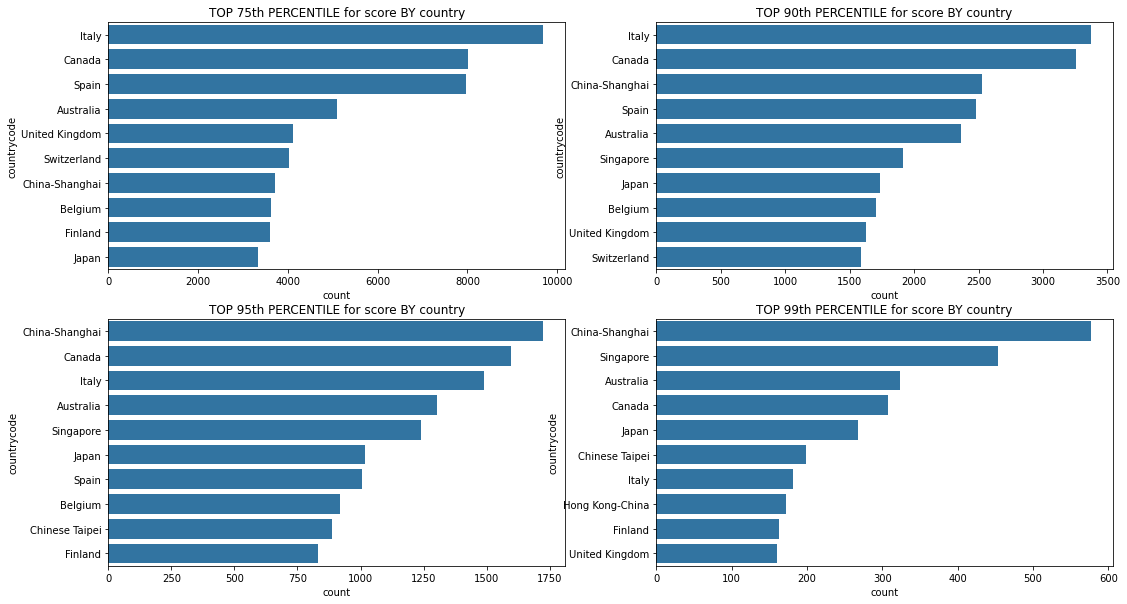

In [193]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(18,10))
ax=ax.flatten()
for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    sns.countplot(y=df.countrycode,color=base_color,  data=df_copy,order=df['countrycode'].value_counts().index[:10])
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE for score BY country')

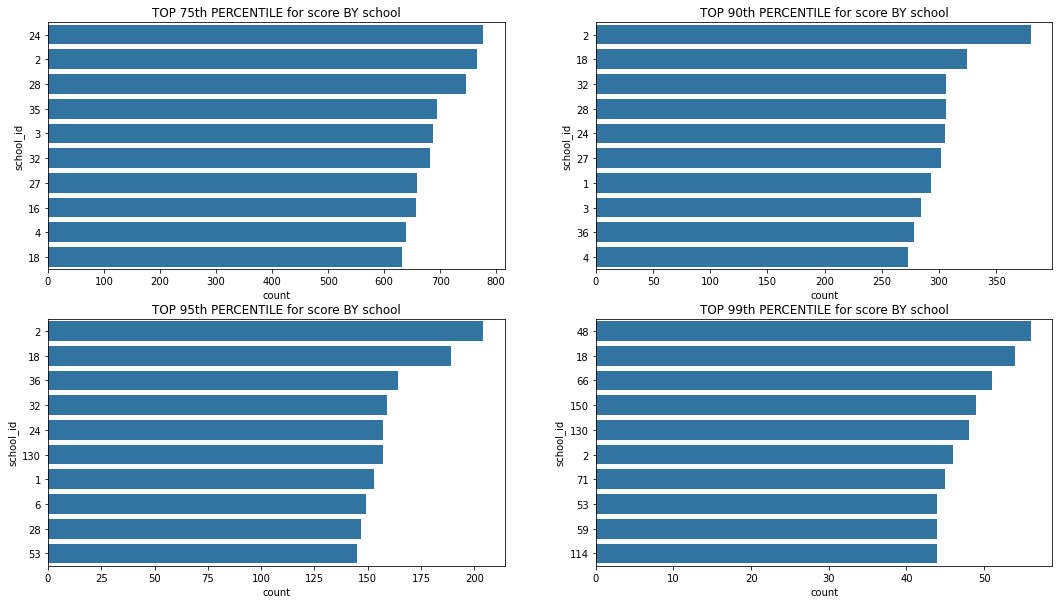

In [194]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(18,10))

ax=ax.flatten()
for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    sns.countplot(y=df.school_id,color=base_color,  data=df_copy,order=df['school_id'].value_counts().index[:10])
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE for score BY school')

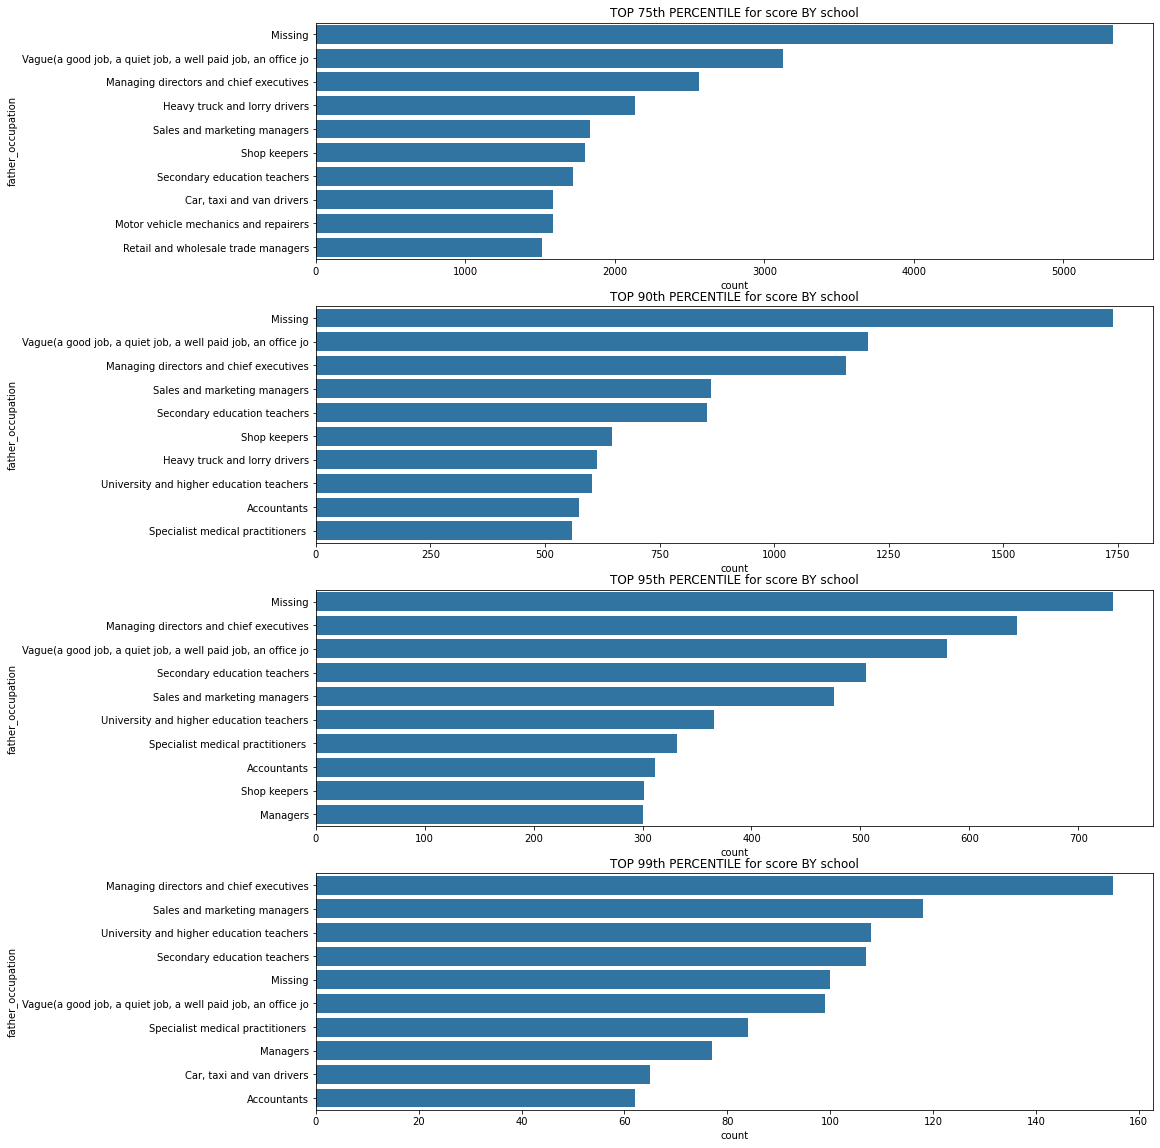

In [212]:
#check top occupation for mothers whose kids got the top scores
fig, ax=plt.subplots(nrows=4, figsize=(15,20))

ax=ax.flatten()
for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    sns.countplot(y=df.father_occupation,color=base_color,  data=df_copy,order=df['father_occupation'].value_counts().index[:10])
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE for score BY school')

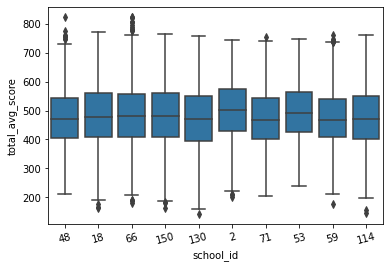

In [195]:
sns.boxplot(data=df_copy,order=df['school_id'].value_counts().index[:10], x='school_id', y='total_avg_score', color=base_color)
plt.xticks(rotation=15);

### Conclusion
Order of the top counteries changed based on the percentile level changed when the level increases the italy goes down in the order instead of being the first country. Same occurs for the ages 

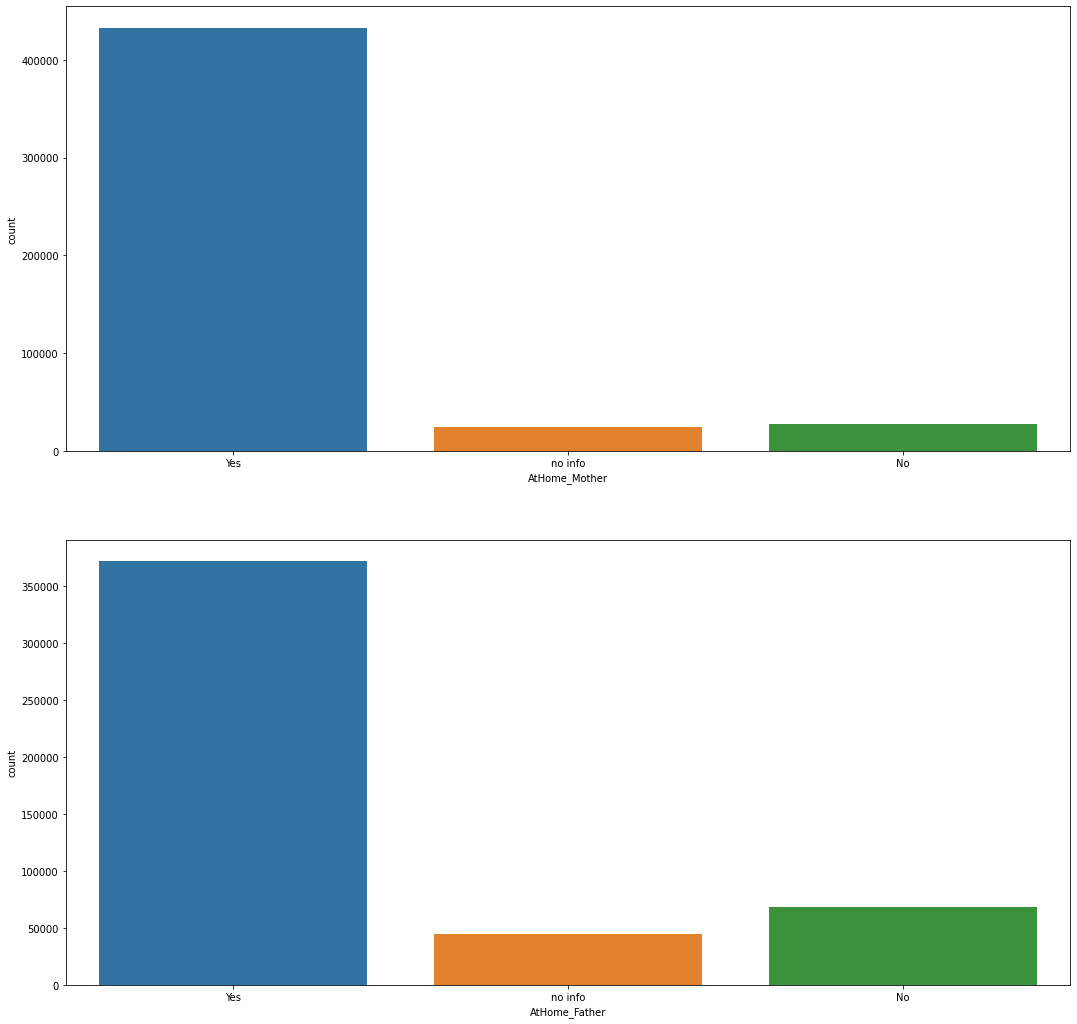

In [200]:
fig, ax = plt.subplots(nrows=2, figsize = [18,18])

default_color = sns.color_palette()[0]
sns.countplot(data = df_copy, x = 'AtHome_Mother',  ax = ax[0])
sns.countplot(data = df_copy, x = 'AtHome_Father',ax = ax[1])

plt.show()

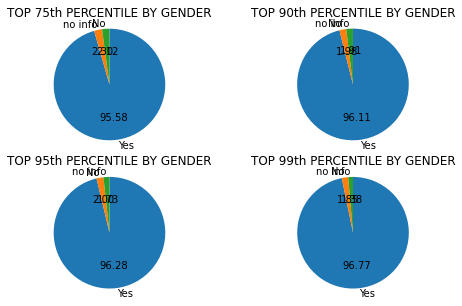

In [204]:
df_75=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.75)')
df_90=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.90)')
df_95=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.95)')
df_99=df_copy.query('total_avg_score>=@df_copy.total_avg_score.quantile(.99)')

percent=[75,90,95,99]

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(8,5))

ax=ax.flatten()
for i in range(4):
    plt.sca(ax[i])
    df=eval('df_'+str(percent[i]))
    #plt.countplot(y=df.countrycode, hue=df.gender, data=df_copy,order=year)
    plt.pie(df['AtHome_Mother'].value_counts(), labels=df['AtHome_Mother'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f')
    plt.axis('square')
    plt.title('TOP '+ str(percent[i])+'th PERCENTILE BY GENDER')

In [ ]:
print(df['AtHome_Mother'].value_counts())
print('=================== \n')
print(df['AtHome_Father'].value_counts())
print('=================== \n')
print(df['late_for_school'].value_counts())
print('=================== \n')
print(df['skip_day'].value_counts())
print('=================== \n')
print(df['skip_classes'].value_counts())
print('=================== \n')
print(df['mother_occupation'].value_counts())
print('=================== \n')
print(df['father_occupation'].value_counts())

In [233]:
scoresvslearntime = ['total_outStudy_time',
                   'total_avg_score','average_math', 'average_science','average_read',
'Learningtime_testlanguage', 'Learningtime_Mathematics','Learningtime_Science'      
]
scorevsoutstudy = ['Out_StudyTime_Homework',
                     'Out_StudyTime_GuidedHomework',
                     'Out_StudyTime_PersonalTutor',
                     'Out_StudyTime_CommercialCompany',
                     'Out_StudyTime_WithParent',
                     'Out_StudyTime_Computer',
                     'Out_StudyTime',
                   'total_avg_score','average_math', 'average_science','average_read'    
]

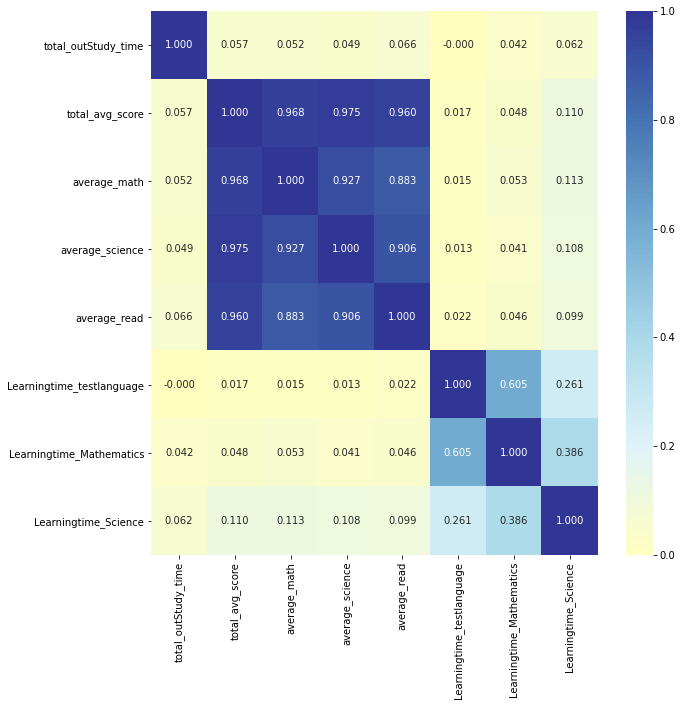

In [252]:
# correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(df_copy[scoresvslearntime].corr(), annot = True, fmt = '.3f',
             cmap="RdYlBu",center = 0)
plt.show()

Based on this correlation it shows that the learning time actually has low correlation with the students results. which is unexpected

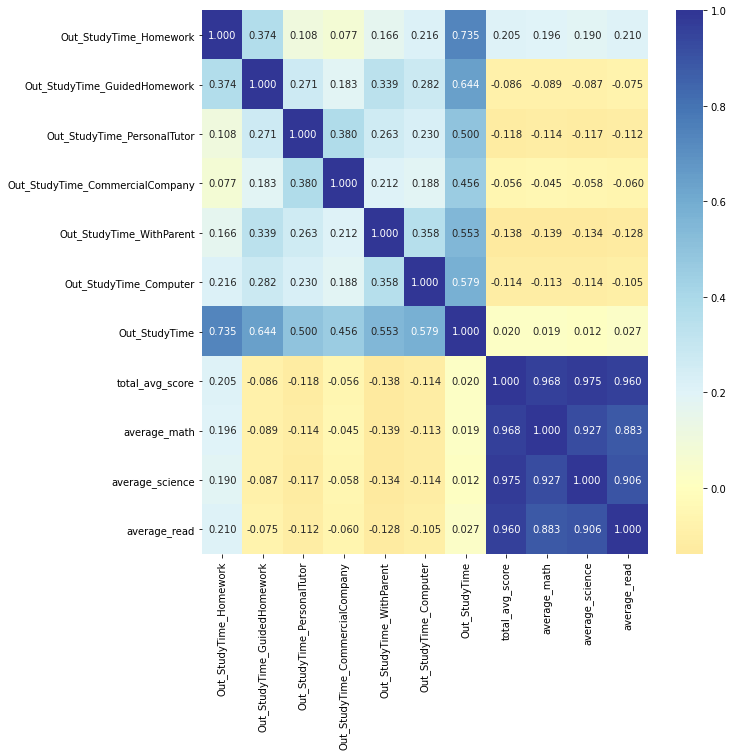

In [251]:
# correlation plot for out study time vs results

plt.figure(figsize = [10, 10])
sns.heatmap(df_copy[scorevsoutstudy].corr(), annot = True, fmt = '.3f',
             cmap="RdYlBu",center = 0)
plt.show()

### conclusion
Again there is almost no related between the study time and the exam scores.

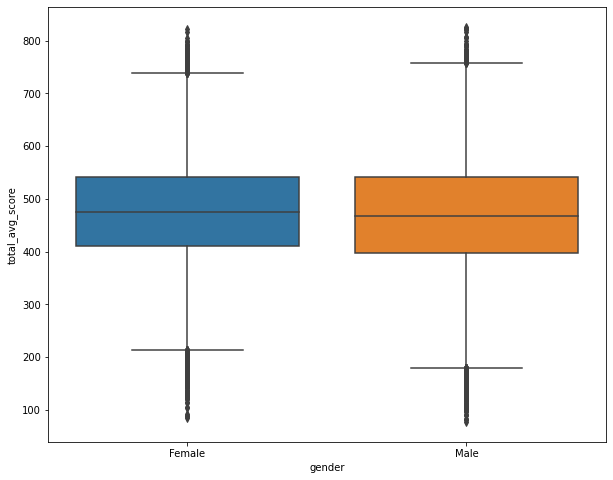

In [275]:
#check the boxplot for gender vs total score
plt.figure(figsize=[10,8])

sns.boxplot(data = df_copy, 
              x = 'gender', 
              y = 'total_avg_score');

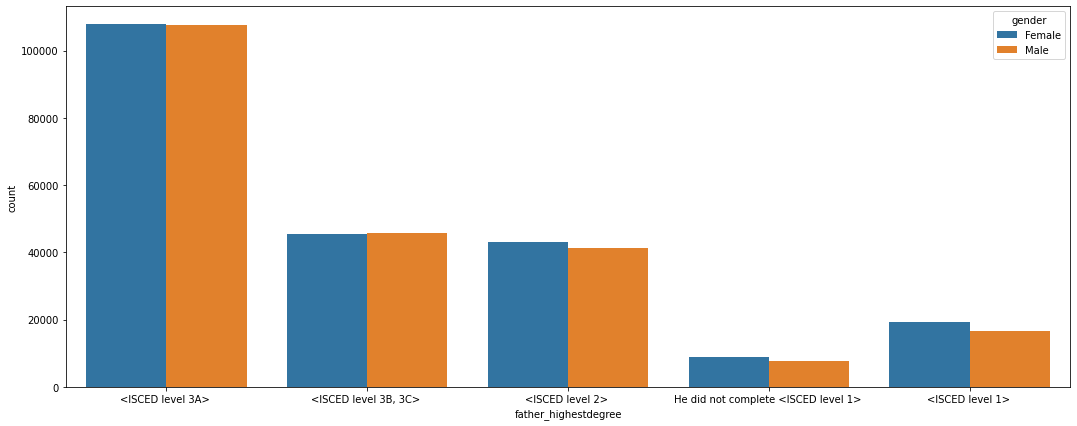

In [350]:
plt.figure(figsize=[18,7])

sns.countplot(data = df_copy, x = 'father_highestdegree', hue = 'gender');

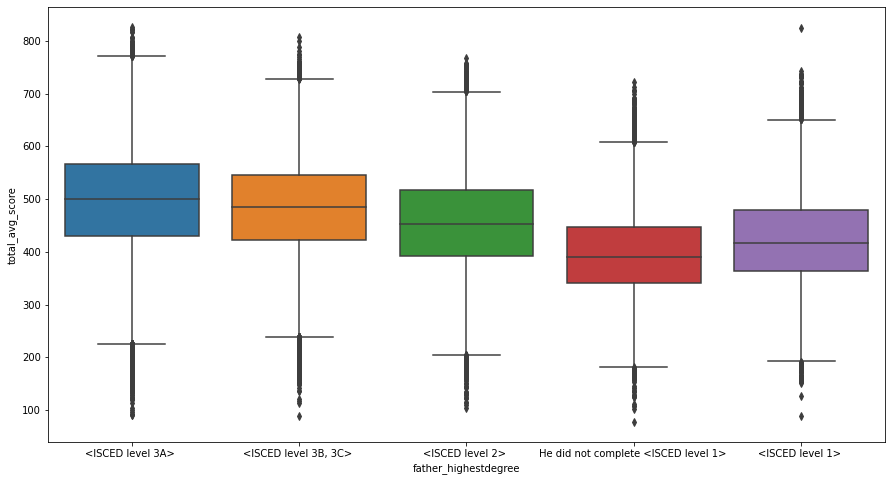

In [366]:
#check the boxplot for gender vs total score
plt.figure(figsize=[15,8])

sns.boxplot(data = df_copy, 
              x = 'father_highestdegree', 
              y = 'total_avg_score');

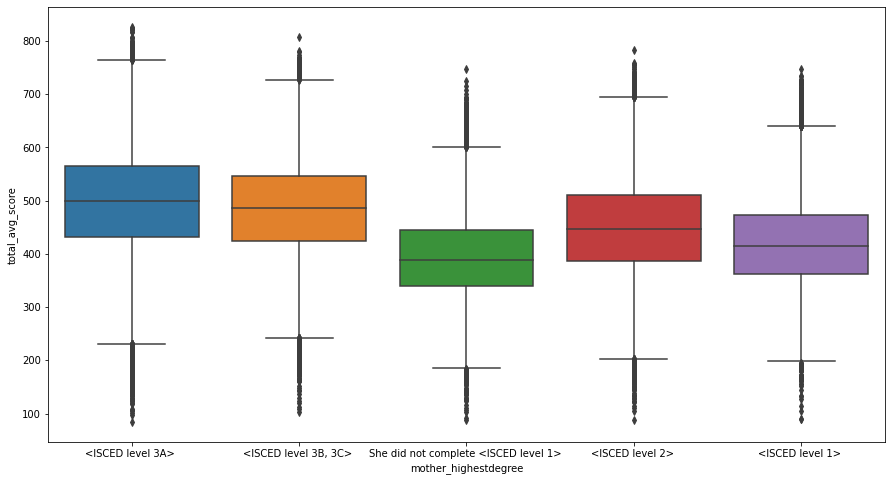

In [365]:
#check the boxplot for gender vs total score
plt.figure(figsize=[15,8])

sns.boxplot(data = df_copy, 
              x = 'mother_highestdegree', 
              y = 'total_avg_score');

it seems that the mean for male and female are mostly the same 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> whith the change of confendece level the defenetion of the top 10 countires and top 10 schools totally changed and as the first country moved down iin the list by increasing the level. 

>Also we thought that the studying time and the out of school study should haave a huge effect on the student' score but this wasn\t the case clearly. as it show the least correlation. 

>Also noticed that parent's education level has effect on student's score. for example the parents who didn't get education. has least mean for the score

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>it was interesting that studying time and out of school extra studies didn't actually has a correlation with the degress. which is seems very weird

## Multivariate Exploration

> from the previous step. we are going to work on the lead to confirm that education is really affecting the score

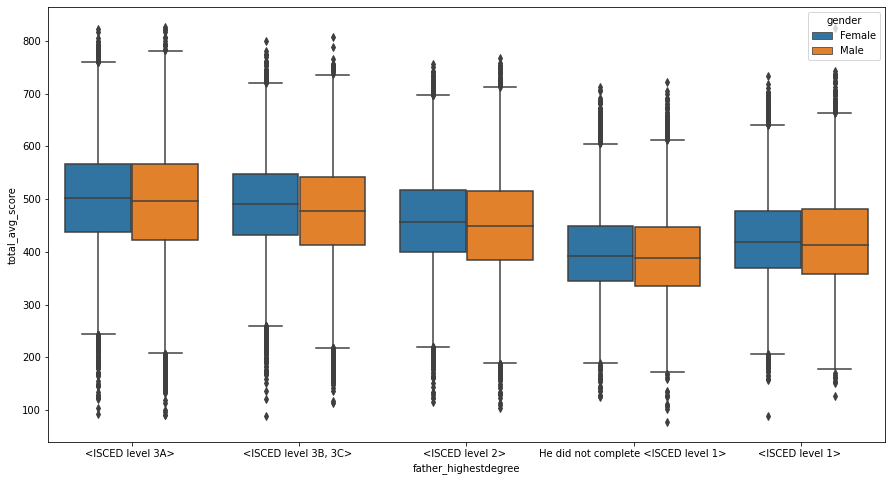

In [360]:
#father education vs score vs gender
plt.figure(figsize=[15,8])
sns.boxplot(data = df_copy, 
              x = 'father_highestdegree', 
              y = 'total_avg_score',
              hue = 'gender');

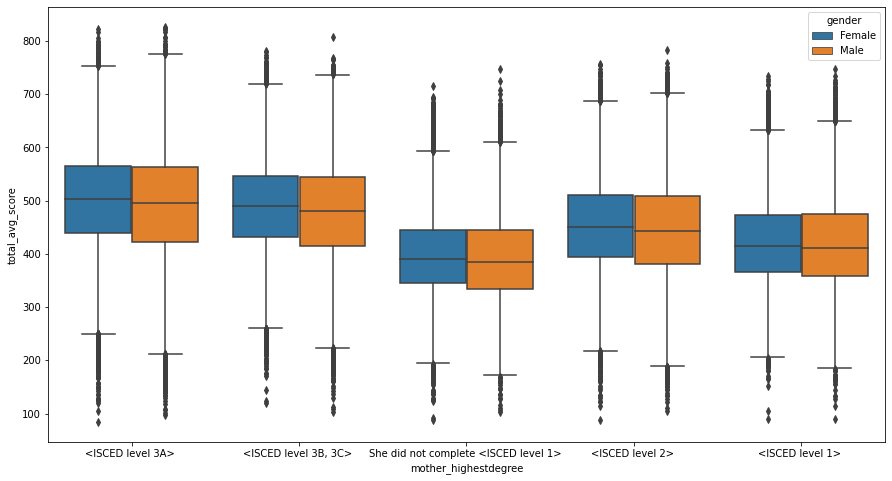

In [359]:
#father education vs score vs gender
plt.figure(figsize=[15,8])
sns.boxplot(data = df_copy, 
              x = 'mother_highestdegree', 
              y = 'total_avg_score',
              hue = 'gender');

it seems that we have outliers that affect itseems that the average of students score decrease with parents who have low education and gradually increase with the increase of learning level. 
also it seems that the mean for the males is always slightly higher than the male's mean

c:\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


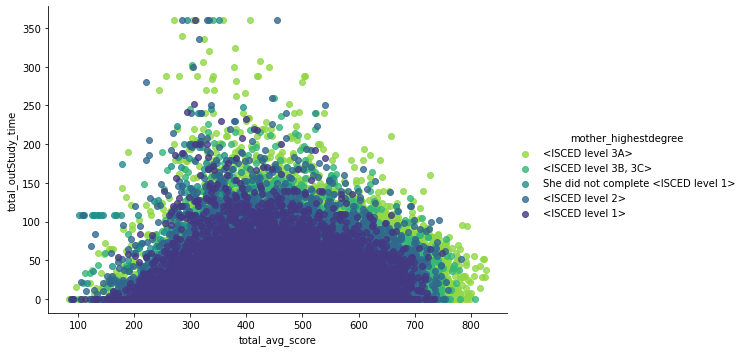

In [381]:
g = sns.FacetGrid(data = df_copy, hue = 'mother_highestdegree', size = 5, aspect = 1.5, palette='viridis_r')
g.map(sns.regplot, 'total_avg_score', 'total_outStudy_time', x_jitter = 0.04, fit_reg = False)
g.add_legend()

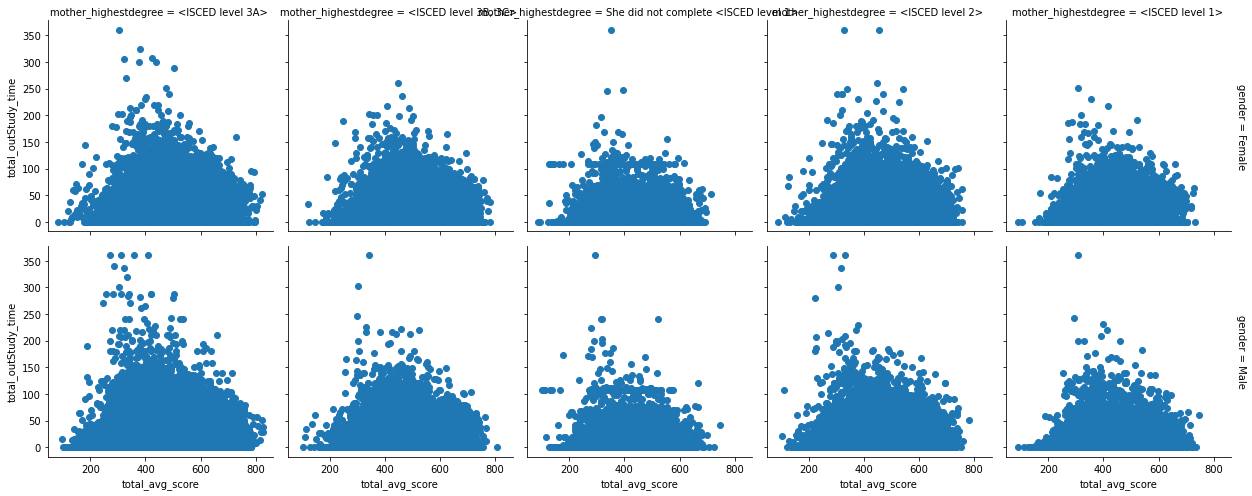

In [376]:
g = sns.FacetGrid(data = df_copy, col = 'mother_highestdegree', row = 'gender' , height = 3.5,
                margin_titles = True)
g.map(plt.scatter, 'total_avg_score', 'total_outStudy_time')

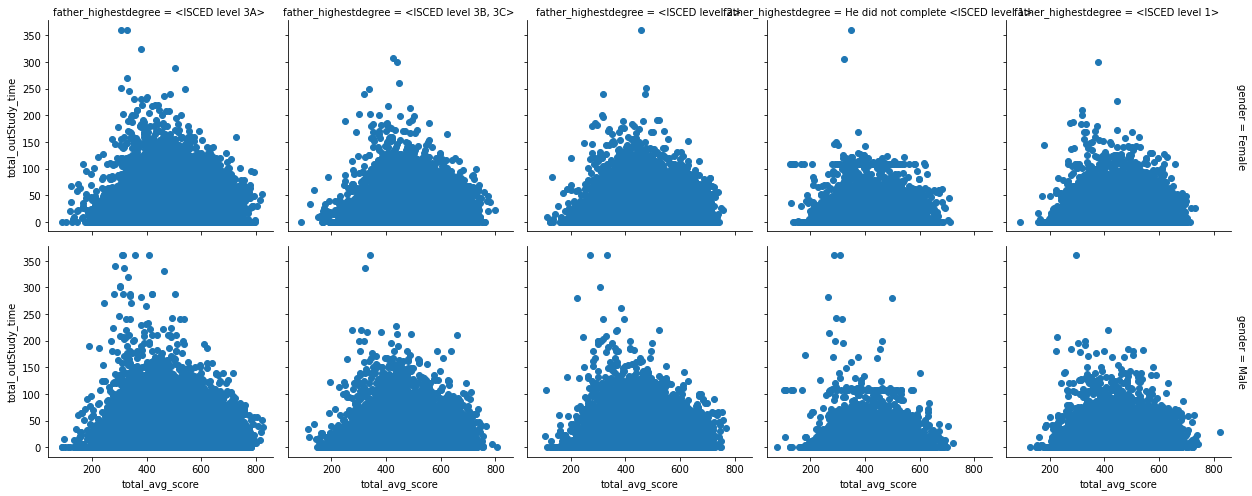

In [405]:
g = sns.FacetGrid(data = df_copy, col = 'father_highestdegree', row = 'gender' , height = 3.5,
                margin_titles = True)
g.map(plt.scatter, 'total_avg_score', 'total_outStudy_time')

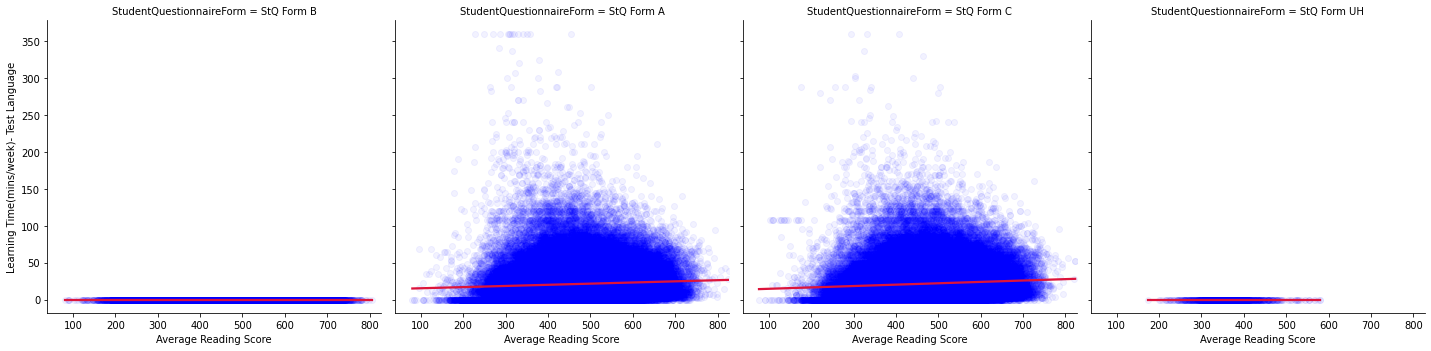

In [391]:
# Faceted heat maps on levels of father's education
g = sns.FacetGrid(data = df_copy, col = 'father_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'total_outStudy_time', color = 'blue', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'crimson'})}
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show()

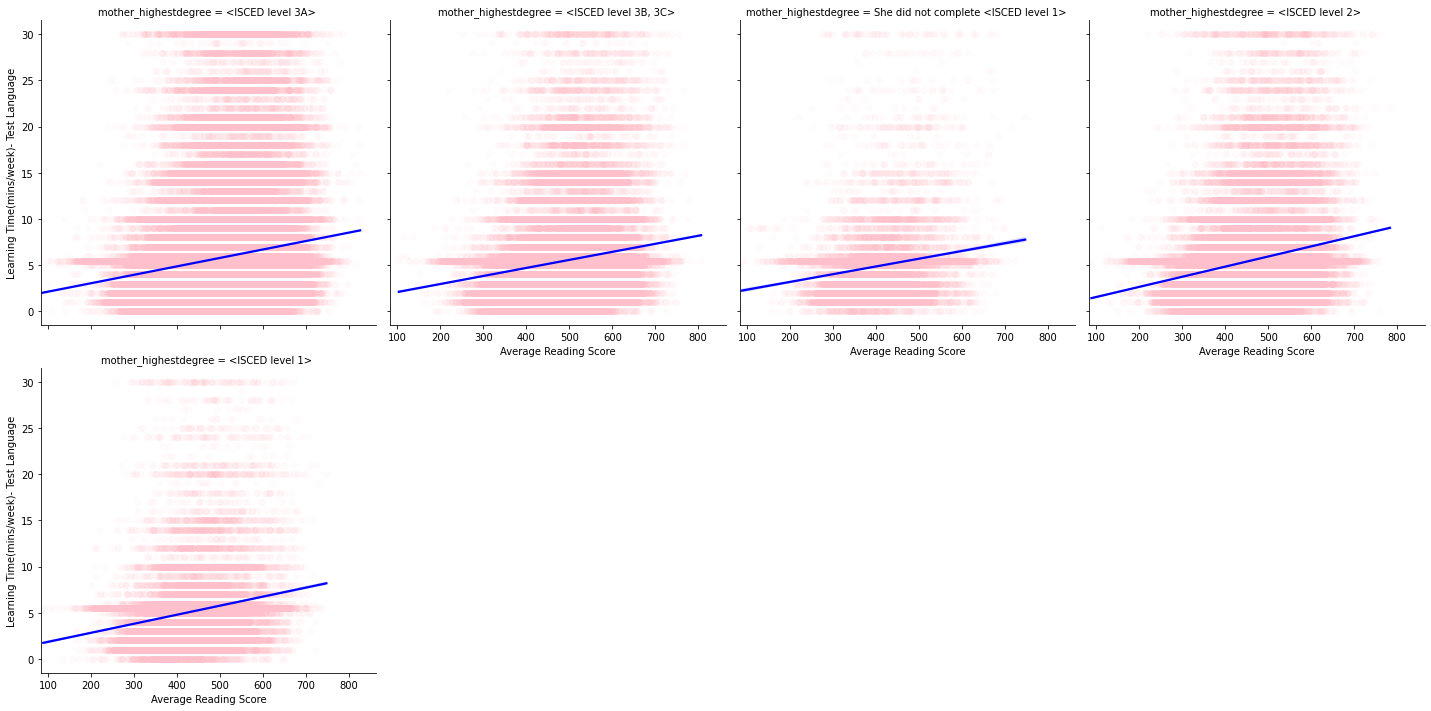

In [393]:
# Faceted heat maps on levels of father's education
g = sns.FacetGrid(data = df_copy, col = 'mother_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'Out_StudyTime_Homework', color = 'pink', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'blue'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show()

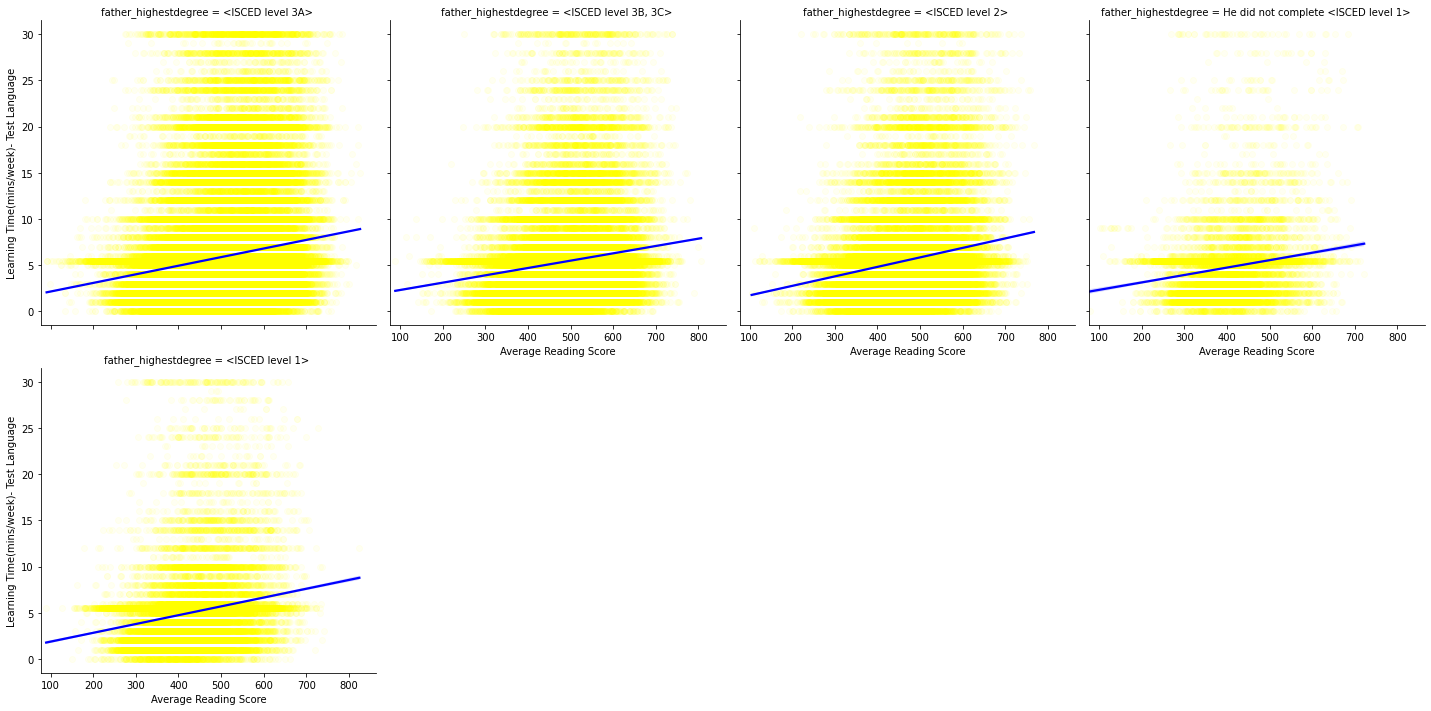

In [392]:
# Faceted heat maps on levels of father's education
g = sns.FacetGrid(data = df_copy, col = 'father_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'Out_StudyTime_Homework', color = 'yellow', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'blue'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show()

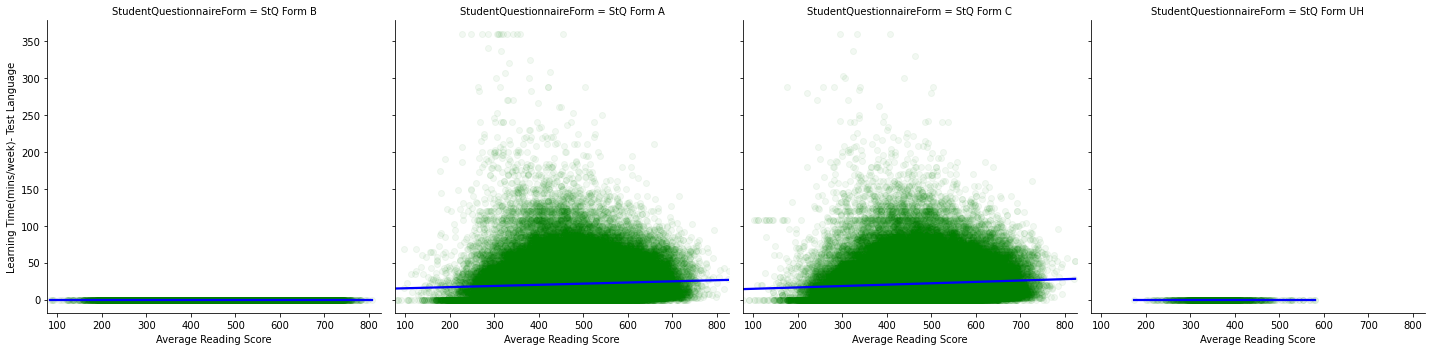

In [396]:
# Faceted heat maps on levels of father's education
g = sns.FacetGrid(data = df_copy, col = 'StudentQuestionnaireForm', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'total_outStudy_time', color = 'green', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'blue'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  to sum this up the main visible relation is the effect of parents education on student's score and performance which increase when parents have higher education. 
> the second relation, was the only feasiable correlation that was shown which shows a slight effect for outschool study "Out_StudyTime_Homework" which has correlatoin with the score with around 0.2

### Were there any interesting or surprising interactions between features?

> yes it was intersting that time of study didn't affect the score. but it was nice to find that homework affect student's score and has an encreasing relation when time increase the score increase accordingly

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!